# Multicollinearity

## 1) Definition:

Define a multivariate linear regression model such that

$Y_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i} + \cdots + \beta_p X_{pi} + \varepsilon_i$ for $i = 1, 2, \cdots, n$ and $\varepsilon_i$ ~ $N(0, \sigma^2)$ for any $i$

if $Cov(X_i, X_j) >> 0$ for any $i \neq j$, we can say that some of the predictor variables are **linearly correlated** and this regression model has **multicolinearity**.

## 2) Description:

Multicollinearity occurs in regression analysis when several predictor variables within a multiple regression model exhibit **strong correlations** with each other. This means that the value of one predictor can be expressed as a linear combination of other predictor variables. This instability hinders the accurate determination of the individual relationships between each predictor and the dependent variable and leads to a decrease in statistical significance of each predictor variable.

## 3) Demonstration:

In [12]:
# Libraries
import datetime
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.decomposition import PCA

# Download real world data where some of the exog variables are correlated
# We will use AAPL, GOOG, MSFT, TLT as exogenous (predictor) variables
# to fit a multivariate regression model to predict TSLA values as endogenous (dependent) variables
# We will look at the data for the last 5 years
end = datetime.datetime.now()
timedelta = datetime.timedelta(5 * 365)  # last 5 years
start = end - timedelta
df = yf.download(["AAPL", "GOOG", "MSFT", "TLT", "TSLA"], start, end)["Adj Close"]  # use adjusted close column
# Show first few rows of dataframe
df.head()

[*********************100%%**********************]  5 of 5 completed


,AAPL,GOOG,MSFT,TLT,TSLA
Date,,,,,
2018-12-10,40.695980,51.977501,102.167168,106.529106,24.343332
2018-12-11,40.463226,52.587502,103.116737,106.511147,24.450666
2018-12-12,40.576008,53.183998,103.582062,106.036293,24.440001
2018-12-13,41.019917,53.095001,103.933388,105.785431,25.119333
2018-12-14,39.707382,52.105000,100.685783,106.152779,24.380667


          AAPL      GOOG      MSFT       TLT
AAPL  1.000000  0.903306  0.972498 -0.324846
GOOG  0.903306  1.000000  0.943218 -0.195439
MSFT  0.972498  0.943218  1.000000 -0.274009
TLT  -0.324846 -0.195439 -0.274009  1.000000


<Axes: >

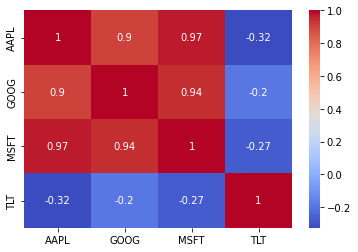

In [18]:
# Look at the correlation matrix for exog variables
exog_corr = df.iloc[:, :4].corr()
# Print the exogenous correlation matrix
print(exog_corr)
# Plot the exogenous correlation matrix
sns.heatmap(exog_corr, annot=True, cmap='coolwarm')


As we can see in the correlation matrix and the plot, because **AAPL, GOOG, MSFT** all show <u> very high </u> correlations with each other, we can say this group of exogenous variables have a **multicolinearity** issue. Therefore, we can expect to reduce the dimensionality of our data after we apply **dimensionality reduction methods** to our dataframe, because some of them will be **statistically insignificant** to explain the variation in **TSLA** values.